In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt 
import tensorflow.keras as keras

In [3]:
cifar = keras.datasets.cifar10

(X1, y1), (X2, y2) = cifar.load_data()

In [5]:
X1 = X1/255.
X2 = X2/255.

Y1 = keras.utils.to_categorical(y1, 10)
Y2 = keras.utils.to_categorical(y2, 10)


In [12]:
cnn = keras.models.Sequential()
cnn.add(keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(32, 32, 3), padding='same'))
cnn.add(keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same'))
cnn.add(keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same'))
cnn.add(keras.layers.MaxPooling2D((2, 2)))
cnn.add(keras.layers.Conv2D(16*3, (3, 3), activation='relu', padding='same'))
cnn.add(keras.layers.Conv2D(16*3, (3, 3), activation='relu', padding='same'))
cnn.add(keras.layers.Conv2D(16*3, (3, 3), activation='relu', padding='valid'))
cnn.add(keras.layers.MaxPooling2D((2, 2)))
cnn.add(keras.layers.Conv2D(16*4, (3, 3), activation='relu', padding='valid'))
cnn.add(keras.layers.Conv2D(16*4, (3, 3), activation='relu', padding='valid'))
cnn.add(keras.layers.Conv2D(16*4, (3, 3), activation='relu', padding='valid'))
cnn.add(keras.layers.Flatten())
#cnn.add(keras.layers.Dense(128, activation='relu'))
cnn.add(keras.layers.Dense(10, activation='softmax'))

cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


c:\Users\ana.sofia.oliveira\Documents\ISEL\AAA2324\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [13]:
cnn.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_27 (Conv2D)              │ (None, 32, 32, 16)     │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_28 (Conv2D)              │ (None, 32, 32, 16)     │         2,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_29 (Conv2D)              │ (None, 32, 32, 16)     │         2,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 16, 16, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_30 (Conv2D)              │ (None, 16, 16, 48)     │         6,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_31 (Conv2D)              │ (None, 16, 16, 48)     │        20,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_32 (Conv2D)              │ (None, 14, 14, 48)     │        20,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 7, 7, 48)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_33 (Conv2D)              │ (None, 5, 5, 64)       │        27,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_34 (Conv2D)              │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_35 (Conv2D)              │ (None, 1, 1, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 155,834 (608.73 KB)

 Trainable params: 155,834 (608.73 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
train = cnn.fit(X1, Y1, epochs=10, batch_size=32, validation_data=(X2, Y2))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 13ms/step - accuracy: 0.3091 - loss: 1.8442 - val_accuracy: 0.5333 - val_loss: 1.2958
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.5535 - loss: 1.2310 - val_accuracy: 0.6222 - val_loss: 1.0627
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.6413 - loss: 1.0062 - val_accuracy: 0.6603 - val_loss: 0.9646
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.6936 - loss: 0.8695 - val_accuracy: 0.6922 - val_loss: 0.8832
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41445s 27s/step - accuracy: 0.7271 - loss: 0.7689 - val_accuracy: 0.7020 - val_loss: 0.8819
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 69s 44ms/step - accuracy: 0.7545 - loss: 0.7023 - val_accuracy: 0.7229 - val_loss: 0.8143
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 384s 246ms/step - accuracy: 0.7783 - loss: 0.6292 - val_accuracy: 0.7301 - val_loss: 0.8056
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 114s 73ms/step - accuracy: 0.7

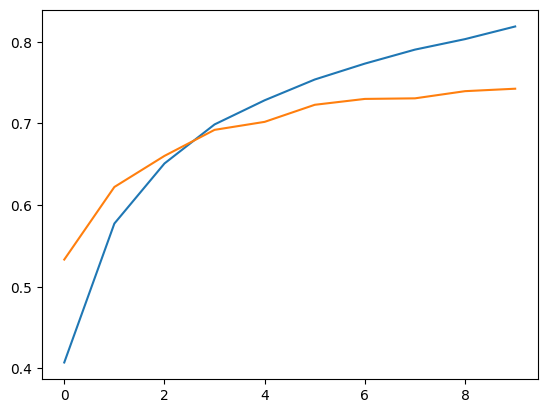

In [15]:
plt.plot(train.history['accuracy'])
plt.plot(train.history['val_accuracy'])
plt.show()